## ZRE - Practicals - 1

## EX. 1
Let's record some audio:

    1. Using Audacity (or anything else), record an audio saying two random words any any random way.
        - 16 bitdepth, 32 bitdepth
        - Fs1 = 16 kHz, Fs2 = 8 kHz
    2. Save the audio with Fs = 16 kHz and bit-depth 16 bit as test.wav and as test.l16

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import scipy.signal as sg
from IPython.display import Audio, display

In [48]:
!gdown -O audio --folder https://drive.google.com/drive/folders/1f7MUZXEbSTekSxJPz8foshYutmBhRT6W
!ls -la audio

Retrieving folder contents
Processing file 1mZp26k48diVMgipA3FxOkuDUSXSAeUjc buongiorno16.wav
Processing file 1l5cq-QW_3B5F4R1c3XgsyBd9pr4fSOaL michiamanomimi8.wav
Processing file 19pUMFP6NtDhqrNSKqCOPWjkzrYYfqnSd michiamanomimi16.wav
Processing file 1EKvrDRq4ItTwvP7N9v4ya_G2GIkQQFHE soprano.wav
Processing file 1pDEEgt4joVKbAWEfY8yc6ir7xx7Sc3gn tancovala8.wav
Processing file 1VQbzwr_CJKbt_E33RVEMGVVMOJtvmgsO test.l16
Processing file 1HySw6Dlal3y8FIq9_4rRzIJTcNCbqAyN test.wav
Processing file 1OrjprjOPC2DqDg4mtx-Khzu5VjNFT2Ku vic8.wav
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1mZp26k48diVMgipA3FxOk

#### Q1 : What's the difference between .wav and .l16? And what about .flac?

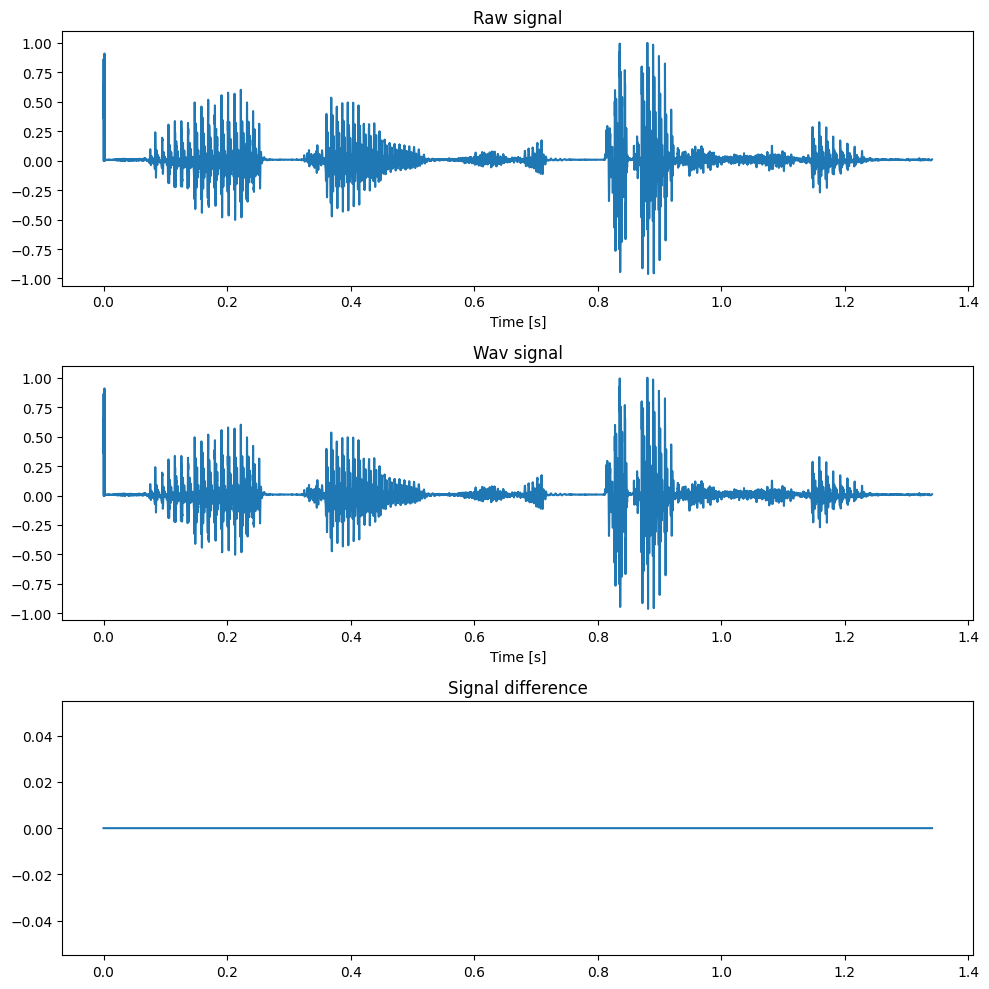

In [54]:
sr, Fs_r = sf.read('/content/audio/test.l16', channels=1, samplerate=8000, format='RAW', subtype='PCM_16')
sw, Fs = sf.read('/content/audio/test.wav')

xaxis = np.arange(len(sw))/Fs
fig, ax = plt.subplots(3,1,figsize=(10,10))
ax[0].set_title('Raw signal')
ax[0].plot(xaxis,sr)
ax[0].set_xlabel('Time [s]')
ax[1].set_title('Wav signal')
ax[1].plot(xaxis,sw)
ax[1].set_xlabel('Time [s]')
ax[2].set_title('Signal difference')
ax[2].plot(xaxis, sr - sw)
plt.tight_layout()
plt.show()

#### Q2 : How is the same signal at bitdepth 32 bit? What is the bit rate (bit/s)?

In [57]:
bit_rate_16 = Fs * 16
bit_rate_32 = Fs * 32

print(f"Bit rate at {Fs} Hz:")
print(f"16-bit signal: {bit_rate_16} bit/s")
print(f"32-bit signal: {bit_rate_32} bit/s")


Bit rate at 8000 Hz:
16-bit signal: 128000 bit/s
32-bit signal: 256000 bit/s


#### Q3 : What happens, if we record a soprano opera singer at 8 kHz Fs? How will the spectrogram look?

The higher harmonic frequencies (above 4kHz), will create aliasing artifacts (non-harmonic frequencies that were not originally present).

## EX. 2

Let's load the signals here and play with them a little bit...

    1. load the signals (test.wav and test.l16)
    2. compare them
    3. center them
        - using the whole recorded signal
        - ONLINE
    4. compare the calculated means

#### 1-2 Load and compare

#### 3 CENTERING

##### Offline

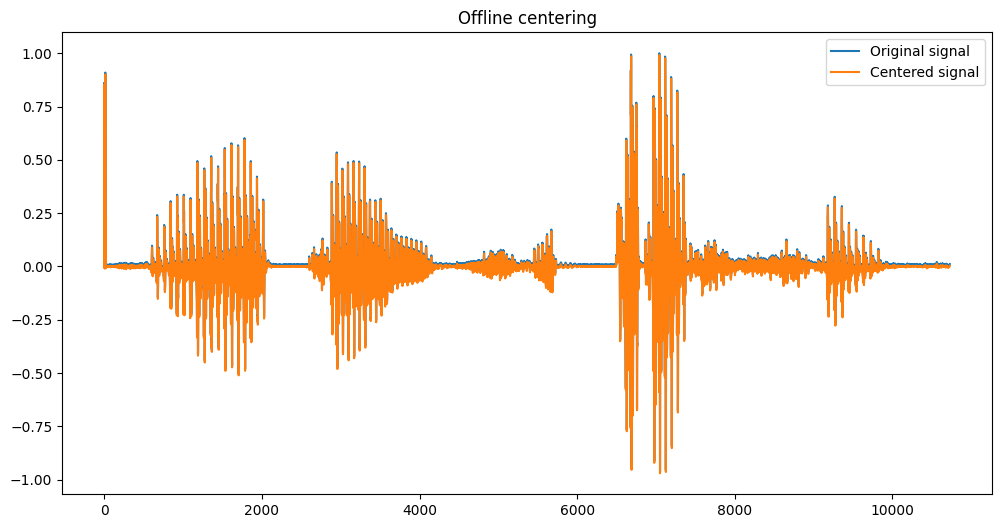

In [63]:
sc = sw - np.mean(sw) # centered signal

plt.figure(figsize=(12,6))
plt.title('Offline centering')
plt.plot(sw, label='Original signal')
plt.plot(sc, label='Centered signal')
plt.legend()
plt.show()

##### Online
We need to calculate the cumulative average value to center the signal from the samples seen so far at every time frame. How would you do it?

##### Calculated means

#### Q1 : Why is the centering useful? Play the new signals - do you hear the difference?

In [ ]:
def cum

#### Q2 : Why the online evaluation of the mean value is unstable, how to solve this?

## EX. 3

Let's sample the signal...

    1. create frames (a vocal, a consonant, ...), play them and save them - (mimi, Hm, den)
    3. plot spectrogram(s)
    2. create a function for separating a signal into frames: get_frames(frame_duration, overlap)
    3. separate your test16.wav into frames - frame_duration = 160 samples, overlap = 0
    

#### 1 Preparing the frames

#### 2 Spectrograms


#### 3 Frame-segmentation


#### Q0 : Why when saving a new .wav file the Fs is needed as input?

#### Q1 : What's the minimal frame duration needed to recognize the letter? How long are 160 samples?

#### Q2 : What fundamental frequencies do you see?

## EX. 4

Let's analyse 1 frame...

    1. plot the spectrum
    2. try with zero-padding
    3. plot PSD
    4. plot log(PSD)
    5. make your own spectogram function and plot you personal spectrogram

#### 1 Spectra

#### 2 Zero padding

#### 3-4 PSD and lof(PSD)

#### 5 DIY - spectogram

#### Q2 : What do you see in log(PSD) better, why?

#### Q3 : How are the spectra calculated (pytorch implementation)?

## EX. 5

Let's downsample our signal to 8 kHz...

    1. choose the filter and plot its frequency characteristic (in dB)
    2. filter the signal and listen to it
    3. downsample your signal and listen to it
    3. plot the new spectrogram
    

#### 1 Filter

Downsample the signal of Fs = 8 kHz to a signal of 8 kHz. - we use a lowpass filter with passband freq 4 kHz and stopband 4100 kHz.

#### 2 Downsample

#### 3 Test downsampling on music

#### Q1 : What happened to the energy of the downsampled signal? Listen.

#### Q2 : Is 8 kHz as sampling frequency enough for speech? And what about music?